In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.tail()

,CO2
Kuukausi,
2018-09-01,405.51
2018-10-01,406.00
2018-11-01,408.02
2018-12-01,409.07
2019-01-01,410.81


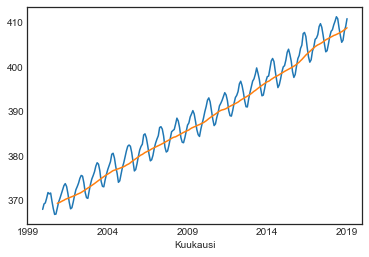

In [15]:
df['CO2'].plot()

#Liukuva keskiarvo CO2-pitoisuudesta
df['CO2'].rolling(12).mean().plot()

In [4]:
df['pmuutos'] = df['CO2'].pct_change()
df.head()

,CO2,pmuutos
Kuukausi,,
1999-12-01,368.04,NaN
2000-01-01,369.25,0.003288
2000-02-01,369.50,0.000677
2000-03-01,370.56,0.002869
2000-04-01,371.82,0.003400


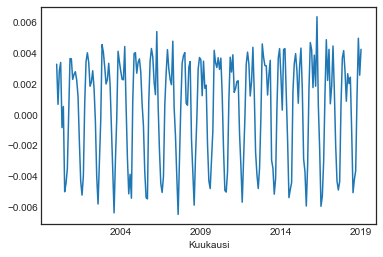

In [5]:
#Prosenttimuutokset kuvaajana
df['pmuutos'].plot()

In [6]:
#Tunnuslukuja
df.describe()

,CO2,pmuutos
count,230.000000,229.000000
mean,388.225652,0.000486
std,12.118057,0.003318
min,366.910000,-0.006476
25%,378.207500,-0.002872
50%,387.365000,0.001514
75%,397.900000,0.003334
max,411.240000,0.006372


In [7]:
#Kuukaudet jolloin CO2-pitoisuudet ovat kasvaneet yli 0,5%
df[(df['pmuutos']>0.005)]

,CO2,pmuutos
Kuukausi,,
2006-04-01,384.73,0.005410
2016-04-01,407.45,0.006372


In [8]:
df['kuukausi'] = df.index.month
df.head()

,CO2,pmuutos,kuukausi
Kuukausi,,,
1999-12-01,368.04,NaN,12
2000-01-01,369.25,0.003288,1
2000-02-01,369.50,0.000677,2
2000-03-01,370.56,0.002869,3
2000-04-01,371.82,0.003400,4


In [9]:
#Millaisia CO2-pitoisuudet ovat olleet eri kuukausina
df.groupby('kuukausi')['pmuutos'].describe()

,count,mean,std,min,25%,50%,75%,max
kuukausi,,,,,,,,
1,20.0,0.003197,0.000648,0.001767,0.002832,0.003150,0.003625,0.004254
2,19.0,0.001862,0.001110,0.000302,0.000817,0.001853,0.002463,0.003875
3,19.0,0.002381,0.000895,0.000622,0.001863,0.002276,0.002909,0.004247
4,19.0,0.003602,0.001245,0.001723,0.002699,0.003400,0.004411,0.006372
5,19.0,0.001484,0.001041,-0.000834,0.000685,0.001514,0.001969,0.003540
6,19.0,-0.001673,0.000907,-0.002952,-0.002288,-0.001712,-0.001169,0.000538
7,19.0,-0.004343,0.000718,-0.005948,-0.004963,-0.004288,-0.003812,-0.003302
8,19.0,-0.005218,0.000688,-0.006476,-0.005742,-0.005161,-0.004829,-0.003866
9,19.0,-0.003684,0.000805,-0.005466,-0.004086,-0.003504,-0.003012,-0.002759


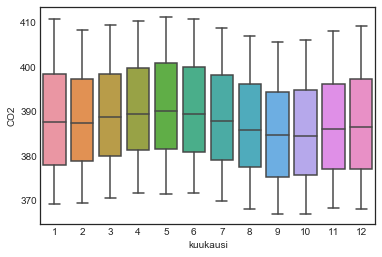

In [14]:
sns.boxplot(x='kuukausi', y='CO2', data=df)